In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

- unemployment (UNRATENSA)
- Noncyclical Rate of Unemployment (NROU)

- interest rates (DFF)
- Stock Market (SP500)
- Employment (PAYEMS) - Job Creation
- Consumption (A794RX0Q048SBEA)
- Disposable income (DSPIC96)
- Industrial Production (INDPRO)
- CPI (CPIAUCNS)

# Download FRED Data

In [2]:
start_date = '1944-01-01'
end_date = '2025-01-01'
source = 'fred'

df_d = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='D'))
df_m = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='MS'))
df_q = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='QS'))

df_m['unrate'] = web.DataReader('UNRATENSA', source, start_date, end_date)
df_m['payems'] = web.DataReader('PAYEMS', source, start_date, end_date)

df_d['sp500'] = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

df_q['consum'] = web.DataReader('A794RX0Q048SBEA', source, start_date, end_date)

df_d['fedrate0'] = web.DataReader('FFWSJHIGH', source, start_date, end_date)
df_m['fedrate1'] = web.DataReader('DFF', source, start_date, end_date)
df_m['cpi'] = web.DataReader('CPIAUCNS', source, start_date, end_date)

df_m['indpro'] = web.DataReader('INDPRO', source, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df_d = df_d.interpolate(method='linear')
df_m = df_m.resample('D').asfreq().interpolate(method='linear')
df_q = df_q.resample('D').asfreq().interpolate(method='linear')

In [4]:
df_d = df_d.merge(df_m, how='left',left_index=True, right_index=True)
df_d = df_d.merge(df_q, how='left',left_index=True, right_index=True)

In [5]:
df_d['fedrate'] = df_d['fedrate1'].combine_first(df_d['fedrate0'])

In [6]:
df = df_d[['sp500', 'unrate', 'payems', 'cpi', 'indpro', 'consum', 'fedrate']].bfill()

In [7]:
df_term = (np.exp(np.log(df[['sp500', 'payems', 'cpi', 'indpro', 'consum']]).diff(1460))**.25 * 100 - 100)
df_year = (np.exp(np.log(df[['sp500', 'payems', 'cpi', 'indpro', 'consum']]).diff(365)) * 100 - 100)

In [8]:
df_term[['unrate']] = df[['unrate']].diff(1460)*.25
df_year[['unrate']] = df[['unrate']].diff(365)

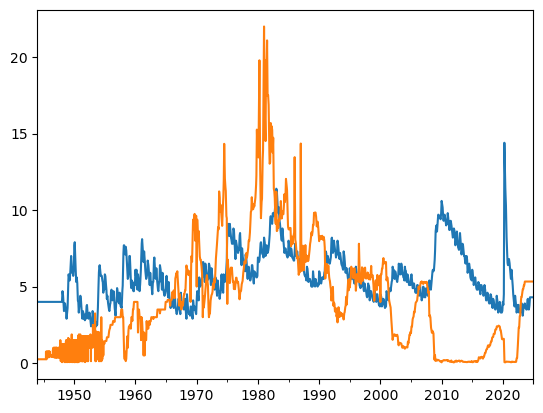

In [9]:
df[['unrate','fedrate']].plot()
plt.legend().remove()
plt.show()

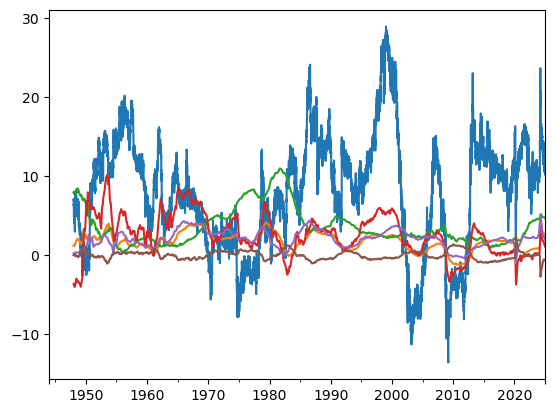

In [10]:
df_term.plot()
plt.legend().remove()
plt.show()

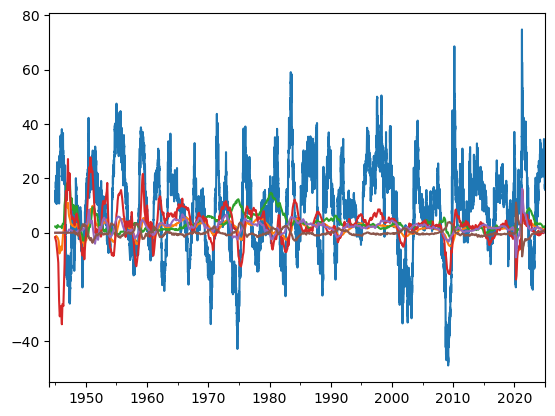

In [11]:
df_year.plot()
plt.legend().remove()
plt.show()

In [12]:
df = df[['unrate','fedrate']]

In [13]:
df[['sp500_t', 'payems_t', 'cpi_t', 'indpro_t', 'consum_t', 'unrate_t']] = df_term[['sp500', 'payems', 'cpi', 'indpro', 'consum', 'unrate']]

In [14]:
df[['sp500_y', 'payems_y', 'cpi_y', 'indpro_y', 'consum_y', 'unrate_y']] = df_year[['sp500', 'payems', 'cpi', 'indpro', 'consum', 'unrate']]

In [15]:
df = df.dropna()
df.describe()

,unrate,fedrate,sp500_t,payems_t,cpi_t,indpro_t,consum_t,unrate_t,sp500_y,payems_y,cpi_y,indpro_y,consum_y,unrate_y
count,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000
mean,5.682963,4.394111,7.925328,1.701010,3.629266,2.632698,2.068215,0.002123,9.111434,1.706177,3.521847,2.791575,2.102401,0.001742
std,1.732169,3.668953,7.138635,1.159910,2.350020,2.618071,1.069521,0.542826,15.762661,2.393730,2.877318,5.670382,2.131030,1.397490
min,2.400000,0.040000,-13.589527,-2.421586,0.281825,-4.013193,-1.022089,-2.721774,-48.822823,-13.400949,-2.868852,-17.206136,-9.025535,-8.700000
25%,4.386667,1.500000,3.241601,1.030254,2.033451,0.872648,1.334100,-0.416935,-0.649233,0.775799,1.648941,0.034469,0.937301,-0.664286
50%,5.480000,3.921613,8.643120,1.806220,2.822286,2.596868,2.127260,-0.017742,10.099277,1.917523,2.875357,2.871590,2.046243,-0.283871
75%,6.720000,6.032301,12.532823,2.454015,4.601995,4.438653,2.734755,0.375000,19.649208,3.069172,4.509789,5.900648,3.305260,0.380645
max,14.400000,22.000000,28.973363,4.947466,10.994152,10.194269,5.051636,2.426667,74.779663,10.866348,14.714035,27.754411,16.233766,11.096667


We can see that all of our series are roughly stationary:

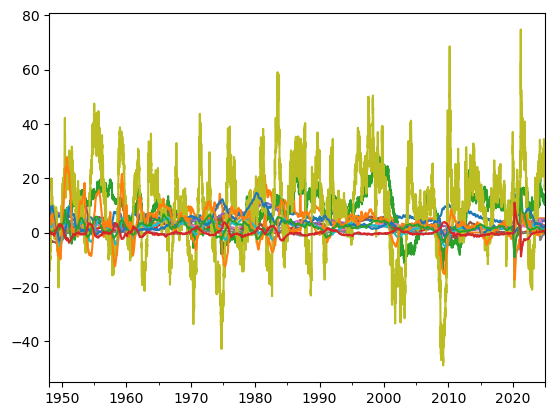

In [16]:
df.plot()
plt.legend().remove()
plt.show()

In [17]:
df_election = pd.read_csv("../Data/raw/election_id.csv", keep_default_na=False)

In [18]:
df_election['election_date'] = pd.to_datetime(df_election['election_date'])
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   election_id    21 non-null     object        
 1   year           21 non-null     int64         
 2   election_date  21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 636.0+ bytes


In [21]:
df_data = df_election.merge(df, how='left', left_on='election_date', right_index=True)

In [22]:
df_data

,election_id,year,election_date,unrate,fedrate,sp500_t,payems_t,cpi_t,indpro_t,consum_t,unrate_t,sp500_y,payems_y,cpi_y,indpro_y,consum_y,unrate_y
0,president_1948,1948,1948-11-02,3.310000,0.875000,6.067795,2.015009,8.119663,-3.420235,0.359797,-0.172500,5.530404,1.564830,4.656863,1.458332,0.772082,-0.690000
1,president_1952,1952,1952-11-04,2.500000,1.750000,12.407855,2.495393,2.502347,7.216122,2.422650,-0.210000,7.953552,3.491299,1.085310,11.659637,4.906270,-0.660000
2,president_1956,1956,1956-11-06,3.916667,3.000000,17.575310,1.448114,0.756052,3.429351,1.870568,0.354167,7.259338,2.332544,2.368552,2.454037,0.506540,0.096667
3,president_1960,1960,1960-11-08,5.786667,2.650000,4.485194,0.497740,2.003638,0.703416,0.783333,0.465000,-3.947827,0.245268,1.360544,-0.516499,-0.453821,0.540000
4,president_1964,1964,1964-11-03,4.513333,3.533333,11.600419,2.367553,1.154354,7.134315,3.312458,-0.291667,15.942823,3.433009,1.265823,7.520051,4.663205,-0.786667
5,president_1968,1968,1968-11-05,3.273333,6.000000,4.895296,3.888394,3.217433,6.293459,3.954028,-0.315000,12.795140,3.421500,4.721538,5.242077,4.809294,-0.393333
6,president_1972,1972,1972-11-07,4.880000,5.450000,2.258771,2.100444,4.609303,3.393241,3.254152,0.406667,20.420597,4.344247,3.598176,11.547719,6.446273,-0.773333
7,president_1976,1976,1976-11-02,7.400000,5.027667,-2.667917,1.707367,8.146120,1.167640,1.602393,0.626667,16.369625,3.268426,4.869230,8.236080,4.054254,-0.400000
8,president_1980,1980,1980-11-04,7.080000,14.164000,6.599106,3.120798,10.201160,2.978554,1.269819,-0.080000,27.857983,0.199147,12.595386,-1.325160,-0.908017,1.466667
9,president_1984,1984,1984-11-06,6.916667,10.036667,7.170426,1.406561,5.296170,1.694733,2.796240,-0.035833,5.249830,4.412191,4.030824,5.333469,3.765079,-1.163333


In [23]:
df_data.to_csv("../Data/clean/macro.csv")